In [2]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# GARCH(2,2) Model

$$
a_t = \varepsilon_t \sqrt{\omega + \alpha_1 a_{t-1}^2 + \alpha_2 a_{t-2}^2 + \beta_1 \sigma_{t-1}^2 + \beta_2 \sigma_{t-2}^2}
$$

$$
a_0, a_1 \sim \mathcal{N}(0,1)
$$

$$
\sigma_0 =1, \sigma_1 = 1
$$

$$
\varepsilon_t \sim \mathcal{N}(0,1)
$$

In [3]:
# create dataset
n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

test_size = int(n*0.1)

series = [gauss(0,1), gauss(0,1)]
vols = [1, 1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + beta_1*vols[-1]**2 + beta_2*vols[-2]**2)
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

Text(0.5, 1.0, 'Simulated GARCH(2,2) Data')

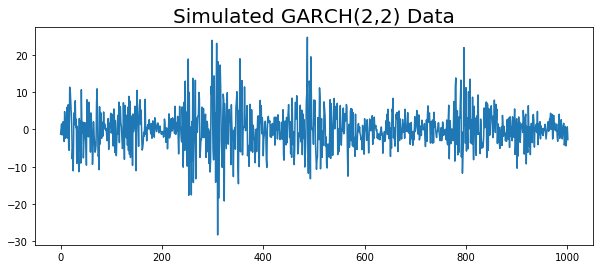

In [4]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated GARCH(2,2) Data', fontsize=20)

Text(0.5, 1.0, 'Data Volatility')

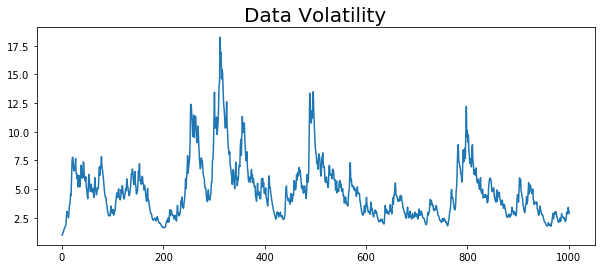

In [5]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

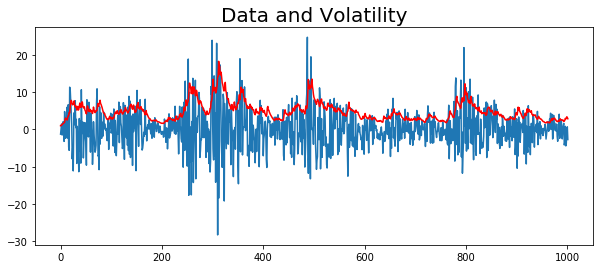

In [6]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=20)

# PACF Plot

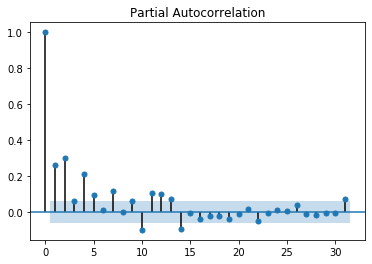

In [7]:
plot_pacf(np.array(series)**2)
plt.show()

# Fit the GARCH Model

In [8]:
train, test = series[:-test_size], series[-test_size:]

In [9]:
model = arch_model(train, p=2, q=2)

In [10]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 2656.9516386806663
Iteration:      2,   Func. Count:     18,   Neg. LLF: 2654.6080438529652
Iteration:      3,   Func. Count:     28,   Neg. LLF: 2653.1219607613402
Iteration:      4,   Func. Count:     38,   Neg. LLF: 2652.2746463326666
Iteration:      5,   Func. Count:     47,   Neg. LLF: 2652.17227870657
Iteration:      6,   Func. Count:     56,   Neg. LLF: 2651.938620620489
Iteration:      7,   Func. Count:     65,   Neg. LLF: 2651.918401062976
Iteration:      8,   Func. Count:     74,   Neg. LLF: 2651.8967681654003
Iteration:      9,   Func. Count:     84,   Neg. LLF: 2651.8938685089715
Iteration:     10,   Func. Count:     92,   Neg. LLF: 2651.8907594038565
Iteration:     11,   Func. Count:    100,   Neg. LLF: 2651.8888892899486
Iteration:     12,   Func. Count:    108,   Neg. LLF: 2651.8875095372514
Iteration:     13,   Func. Count:    116,   Neg. LLF: 2651.887485582776
Optimization terminated successfully.    (Exit mode 0)
 

In [11]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -2651.89
Distribution:                  Normal   AIC:                           5315.77
Method:            Maximum Likelihood   BIC:                           5344.60
                                        No. Observations:                  902
Date:                Tue, Jan 12 2021   Df Residuals:                      896
Time:                        18:13:21   Df Model:                            6
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0816      0.119     -0.688      0.492 [ -0.314,  0.151]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.8010      0.320      2.507  1.218e-02    [  0.175,  1.427]
alpha[1]       0.1614  4.511e-02      3.578  3.462e-04  [7.299e-02,  0.250]
alpha[2]       0.1702  4.971e-02      3.424  6.170e-04  [7.278e-02,  0.268]
beta[1]        0.2107      0.123      1.708  8.760e-02 [-3.106e-02,  0.453]
beta[2]        0.4533      0.101      4.507  6.589e-06    [  0.256,  0.650]
===========================================================================

Covariance estimator: robust
"""

# Predict

In [12]:
predictions = model_fit.forecast(horizon=test_size)

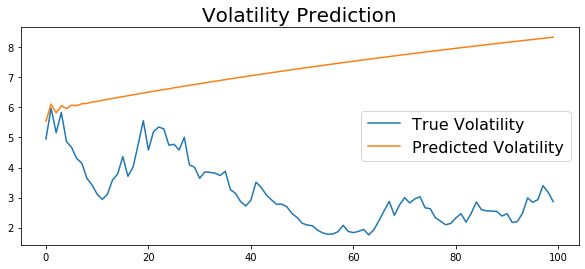

In [13]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

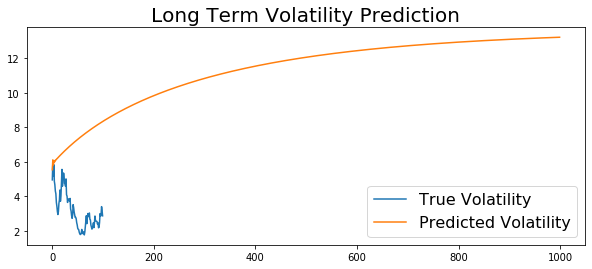

In [14]:
predictions_long_term = model_fit.forecast(horizon=1000)
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

# Rolling Forecast Origin

In [15]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

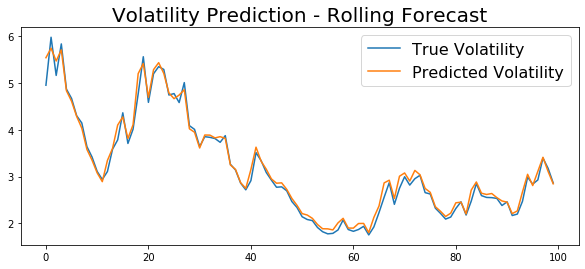

In [16]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)